In [1]:
import warnings
warnings.filterwarnings('ignore')

In [16]:
### Установим красивые дефолтные настройки
import matplotlib as mlp

mlp.rcParams['lines.linewidth'] = 5

mlp.rcParams['xtick.major.size'] = 20
mlp.rcParams['xtick.major.width'] = 5
mlp.rcParams['xtick.labelsize'] = 20
mlp.rcParams['xtick.color'] = '#FF5533'

mlp.rcParams['ytick.major.size'] = 20
mlp.rcParams['ytick.major.width'] = 5
mlp.rcParams['ytick.labelsize'] = 20
mlp.rcParams['ytick.color'] = '#FF5533'

mlp.rcParams['axes.labelsize'] = 20
mlp.rcParams['axes.titlesize'] = 20
mlp.rcParams['axes.titlecolor'] = '#00B050'
mlp.rcParams['axes.labelcolor'] = '#00B050'

### Corporación Favorita Grocery Sales 

Corporación Favorita - крупный эквадорский продуктовый ритейлер. Перед нами набор данных с товарами и количеством их продаж(с учетом скидок и без)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.max_columns = 500

store_nbr - номер магазина  
item_nbr - номер товара  
unit_sales - сколько было продано в данную дату товара item_nbr  
onpromotion - были ли акции, скидки

In [3]:
### Что нужно предсказывать?

train = pd.read_csv('train_cut.csv', index_col=0)

print(f"DataFrame shape is {train.shape}")

train.head()

DataFrame shape is (6274852, 5)


,date,store_nbr,item_nbr,unit_sales,onpromotion
id,,,,,
79,2013-01-01,25,257847,90.000,NaN
480,2013-01-01,25,953609,1.000,NaN
313,2013-01-01,25,671706,2.548,NaN
497,2013-01-01,25,999545,1.000,NaN
440,2013-01-01,25,890372,1.000,NaN


In [4]:
### Описание магазинов

stores = pd.read_csv('stores.csv')

print(f"DataFrame shape is {stores.shape}")

stores.head()

DataFrame shape is (54, 5)


,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4


In [5]:
### Описание продуктов

items = pd.read_csv('items.csv')

print(f"DataFrame shape is {items.shape}")

items.head()

DataFrame shape is (4100, 4)


,item_nbr,family,class,perishable
0,96995,GROCERY I,1093,0
1,99197,GROCERY I,1067,0
2,103501,CLEANING,3008,0
3,103520,GROCERY I,1028,0
4,103665,BREAD/BAKERY,2712,1


In [6]:
### Котировки нефти

oil = pd.read_csv('oil.csv')

print(f"DataFrame shape is {oil.shape}")

oil.head()

DataFrame shape is (1218, 2)


,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20


In [7]:
### Праздничные дни

#перенесен праздник или нет 

holidays_events = pd.read_csv('holidays_events.csv')

print(f"DataFrame shape is {holidays_events.shape}")

holidays_events.head()

DataFrame shape is (350, 6)


,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False


### EDA

In [8]:
train['month'] = train.date.apply(lambda x: str(x)[:7])

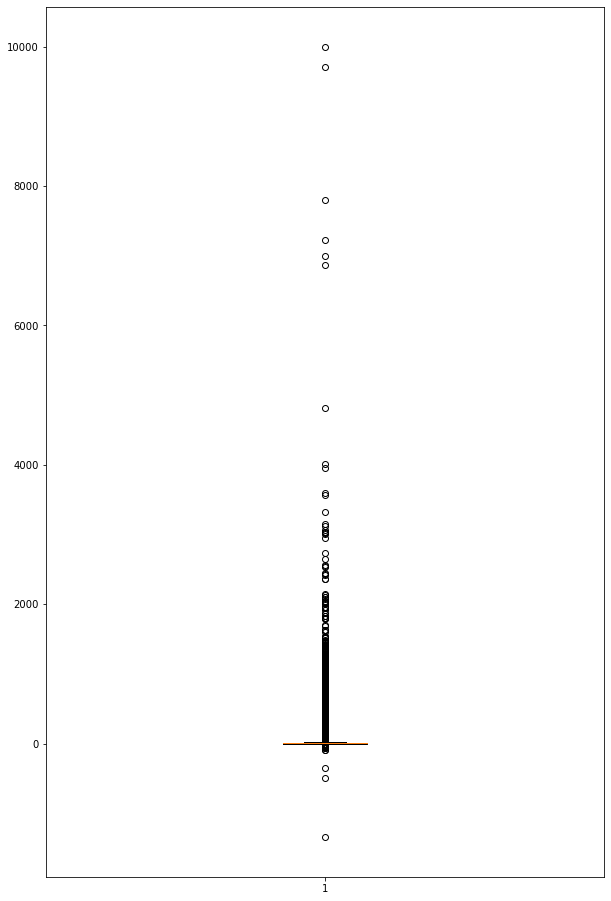

In [9]:
from matplotlib import pyplot as plt

fig = plt.figure()

fig.set_size_inches((10, 16))

plt.boxplot(train['unit_sales'].values)

plt.show()
#отрицат - возврат товара

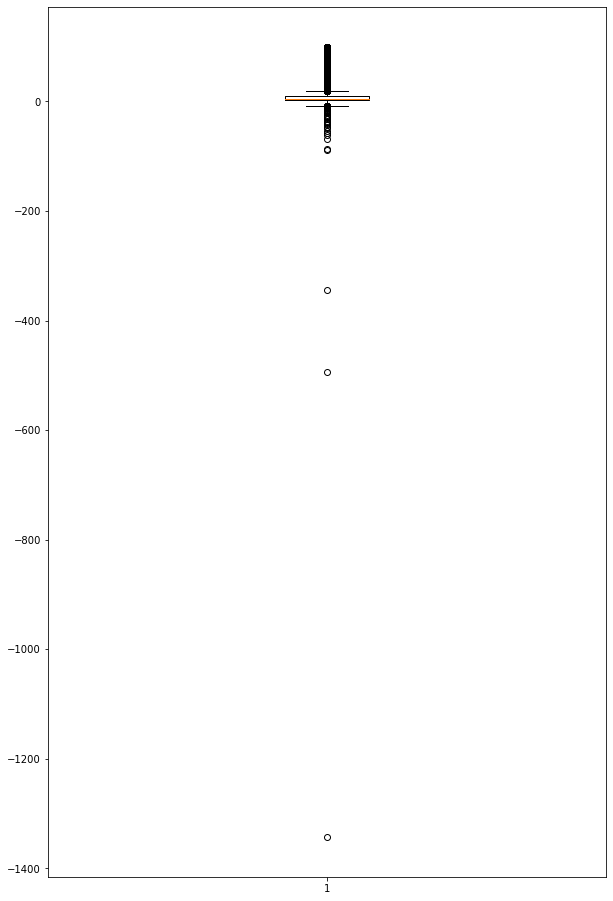

In [10]:
from matplotlib import pyplot as plt

fig = plt.figure()

fig.set_size_inches((10, 16))

plt.boxplot(train[train.unit_sales<=100]['unit_sales'].values)

plt.show()

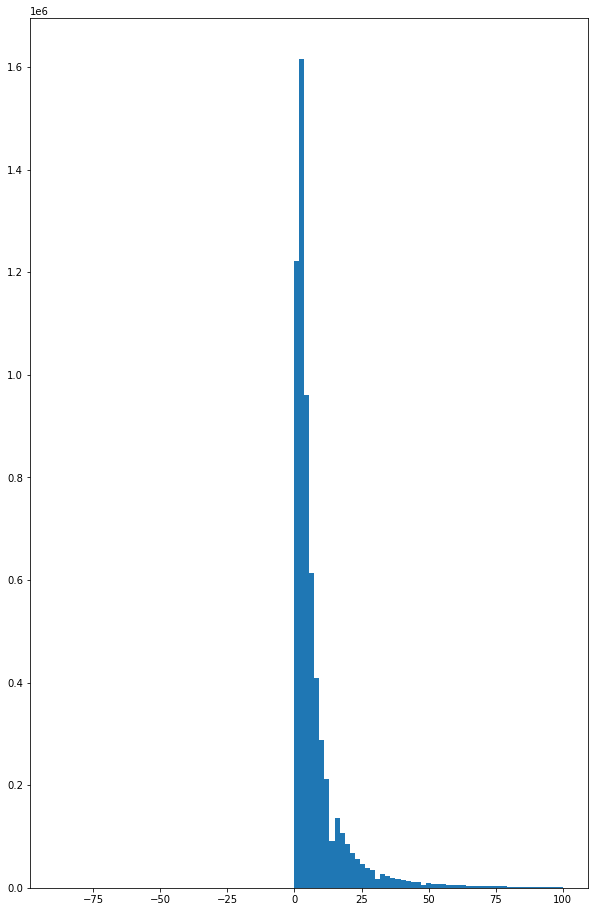

In [11]:
from matplotlib import pyplot as plt

fig = plt.figure()

fig.set_size_inches((10, 16))

plt.hist(train[abs(train.unit_sales)<=100]['unit_sales'].values, bins=100)

plt.show()

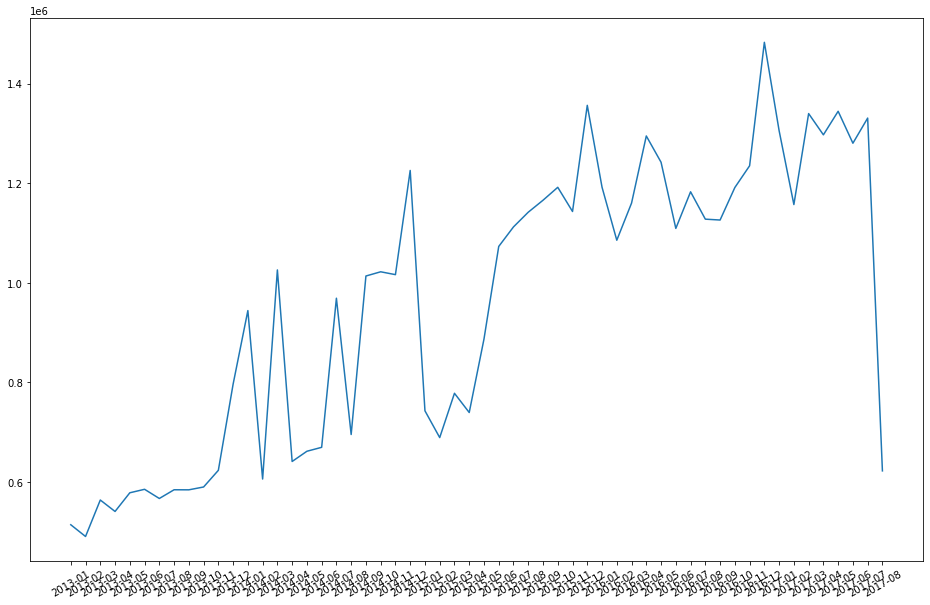

In [12]:
### Количество наблюдений по датам

fig = plt.figure()
fig.set_size_inches(16, 10)

plt.plot(train.groupby('month')['unit_sales'].sum())

plt.xticks(rotation=30, size=10)

plt.show()

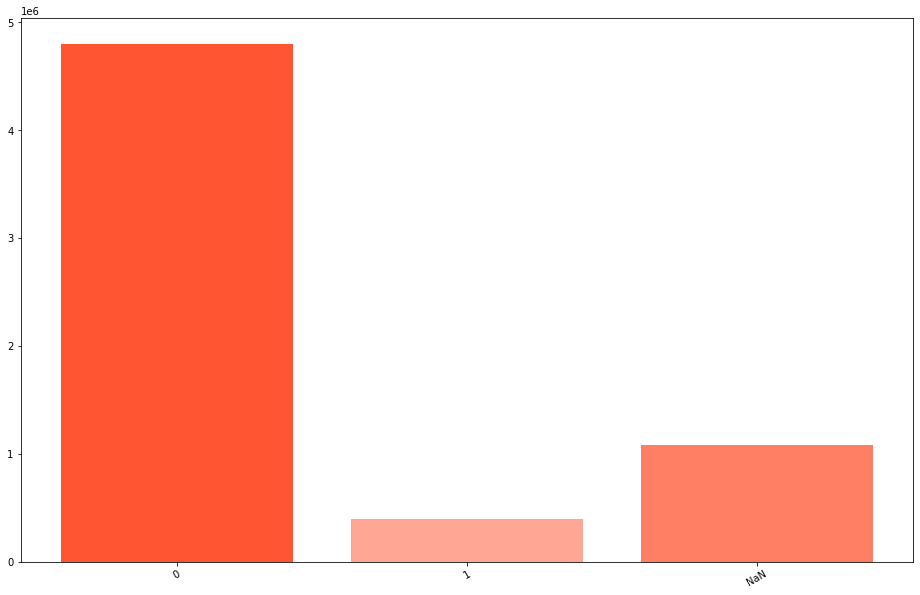

In [13]:
### Распределение onpromotion фичи

def replace_onpromotion(x):
    if x == False:
        return 0
    elif x == True:
        return 1
    else:
        return x
    
train['onpromotion'] = train['onpromotion'].fillna("NaN")
train['onpromotion'] = train['onpromotion'].apply(replace_onpromotion).apply(str)

fig = plt.figure()
fig.set_size_inches(16, 10)


for_hist = train.groupby('onpromotion').size()
plt.bar(for_hist.index, for_hist.values, color=['#FF5533', '#FFA695', '#FF7F65'])

plt.xticks(rotation=30, size=10)

plt.show()

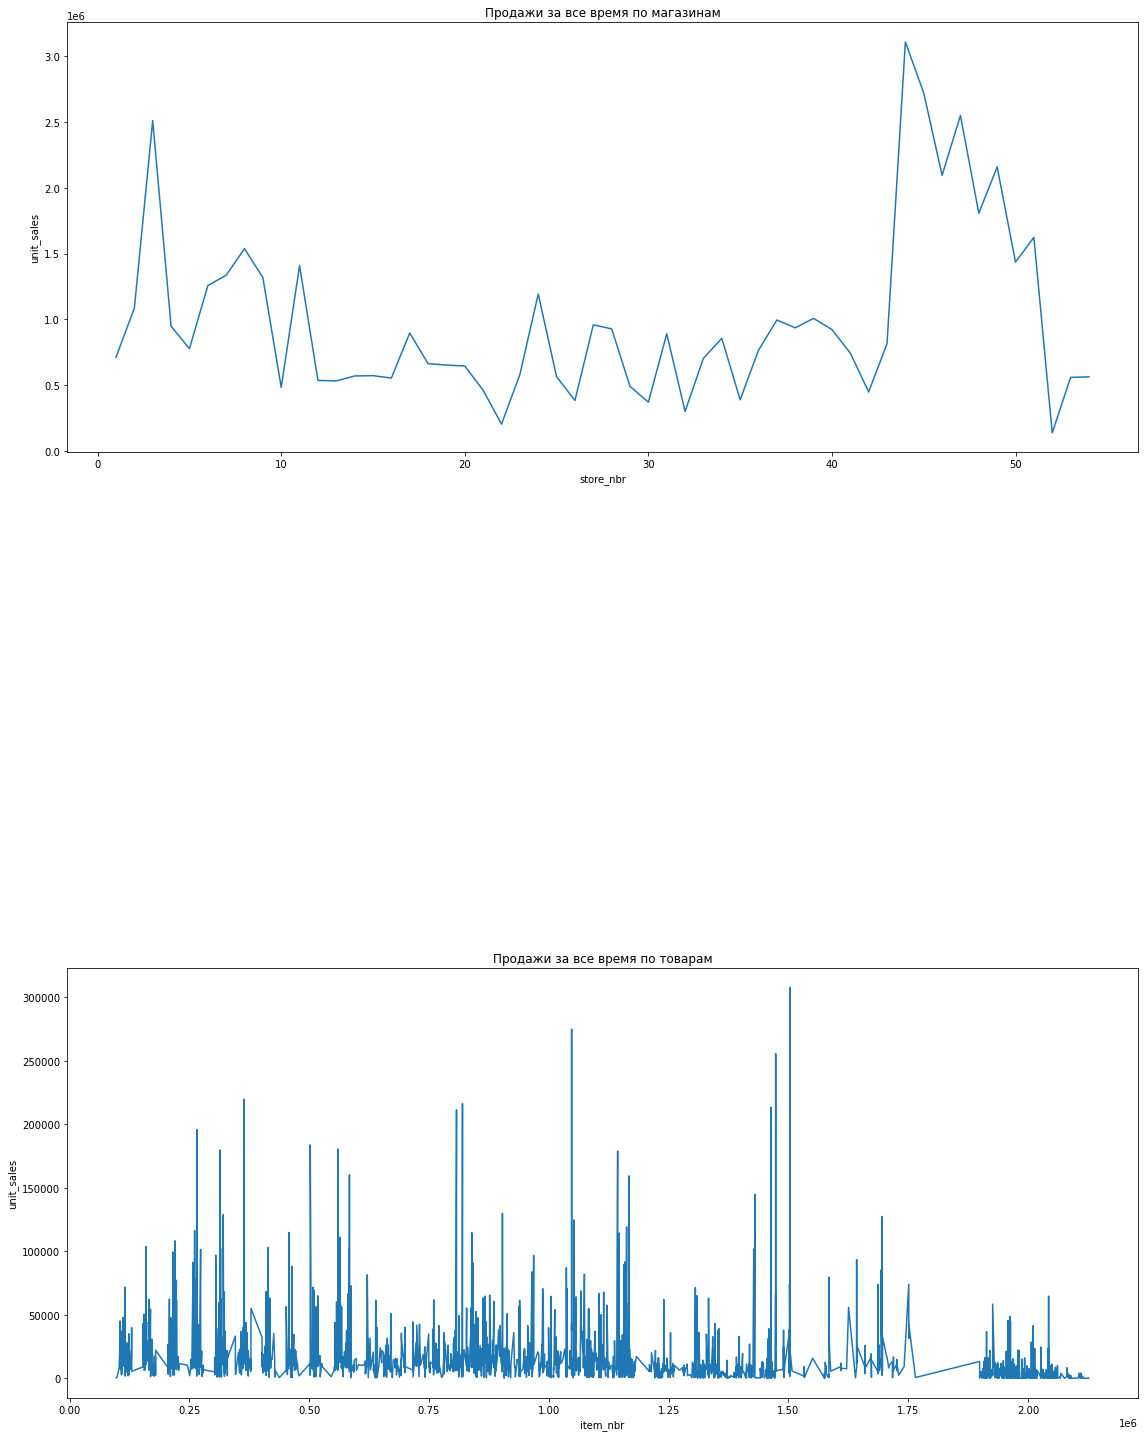

In [14]:
### Распределение магазинов и товаров

fig = plt.figure()
fig.set_size_inches(16, 20)

ax_1 = fig.add_subplot(3, 1, 1)
sns.lineplot(data=train.groupby(by='store_nbr',
                           as_index=False)['unit_sales'].sum().sort_values(by='unit_sales'),
             x='store_nbr',
             y='unit_sales')


ax_2 = fig.add_subplot(3, 1, 3)
sns.lineplot(data=train.groupby(by='item_nbr',
                           as_index=False)['unit_sales'].sum().sort_values(by='unit_sales'),
             x='item_nbr',
             y='unit_sales')




fig.tight_layout()

ax_1.set(title = 'Продажи за все время по магазинам')
ax_2.set(title = 'Продажи за все время по товарам')

plt.show()

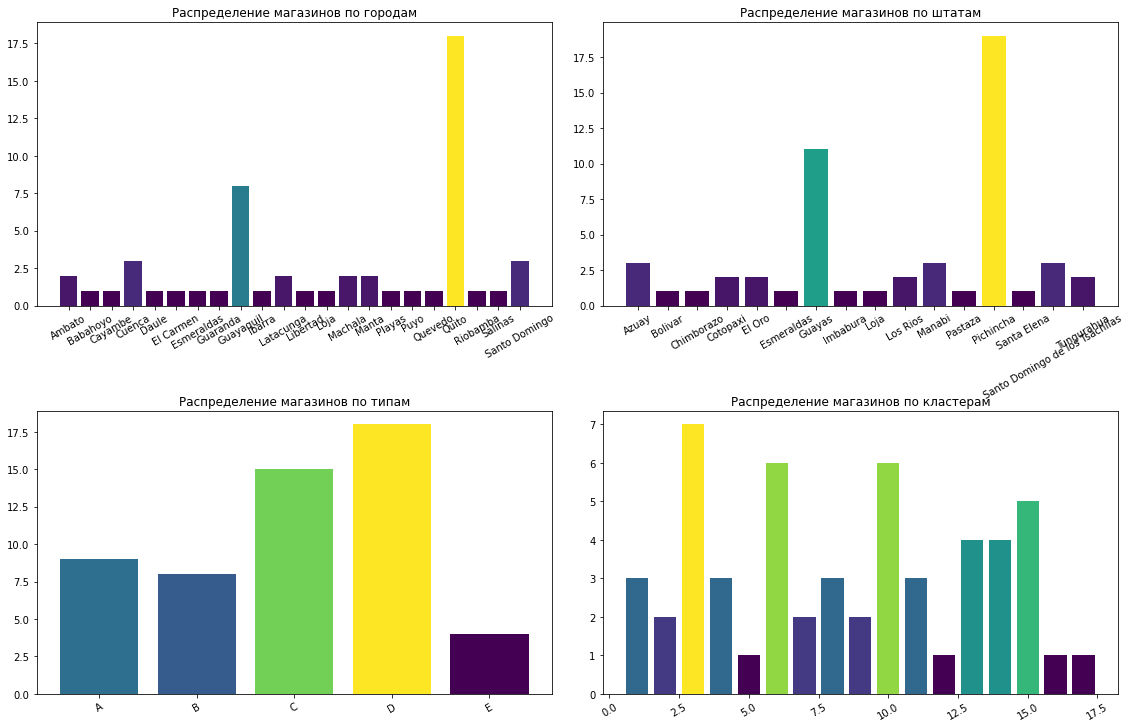

In [15]:
### Распределение магазинов по городам/штатам/типам/кластерам

fig = plt.figure()
fig.set_size_inches(16, 10)


### по городам
ax_1 = fig.add_subplot(2, 2, 1)

my_cmap = plt.get_cmap("viridis")
rescale = lambda y: (y - np.min(y)) / (np.max(y) - np.min(y))

for_hist = stores.groupby('city').size()
plt.bar(for_hist.index, for_hist.values, color=my_cmap(rescale(for_hist.values)))
plt.xticks(rotation=30, size=10)

### по штатам
ax_2 = fig.add_subplot(2, 2, 2)

for_hist = stores.groupby('state').size()
plt.bar(for_hist.index, for_hist.values, color=my_cmap(rescale(for_hist.values)))
plt.xticks(rotation=30, size=10)

### по типу
ax_3 = fig.add_subplot(2, 2, 3)

for_hist = stores.groupby('type').size()
plt.bar(for_hist.index, for_hist.values, color=my_cmap(rescale(for_hist.values)))
plt.xticks(rotation=30, size=10)

### по кластеру
ax_4 = fig.add_subplot(2, 2, 4)

for_hist = stores.groupby('cluster').size()
plt.bar(for_hist.index, for_hist.values, color=my_cmap(rescale(for_hist.values)))
plt.xticks(rotation=30, size=10)

fig.tight_layout()

ax_1.set(title = 'Распределение магазинов по городам')
ax_2.set(title = 'Распределение магазинов по штатам')
ax_3.set(title = 'Распределение магазинов по типам')
ax_4.set(title = 'Распределение магазинов по кластерам')

plt.show()

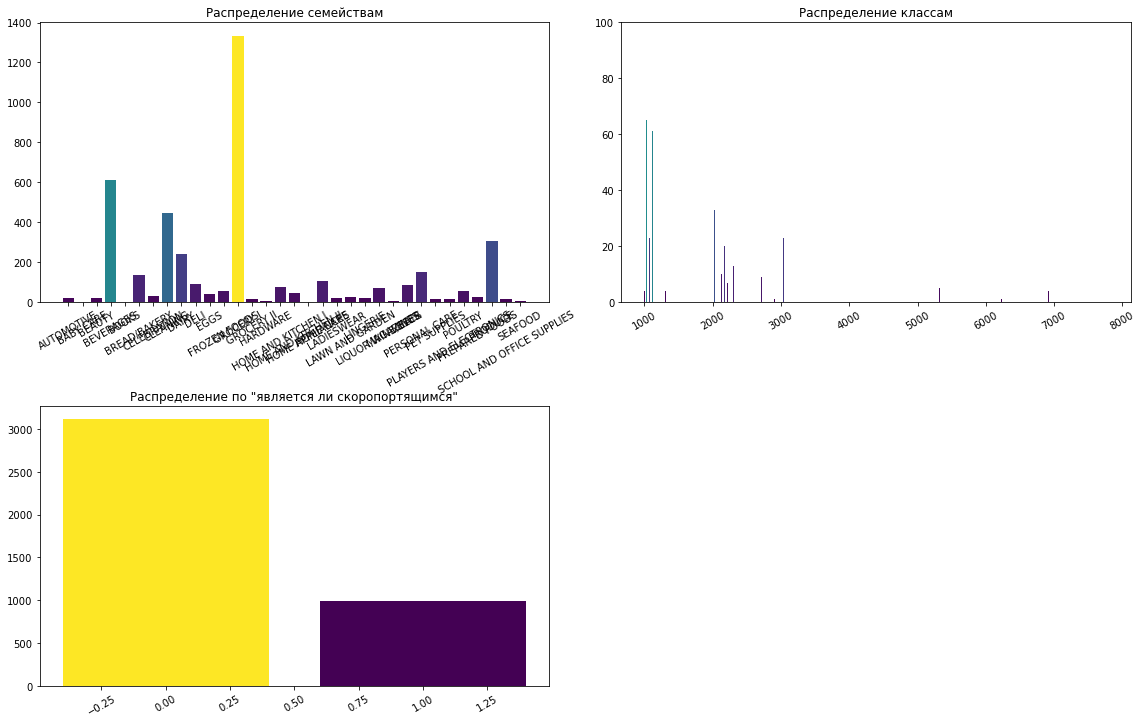

In [16]:
### Распределения продуктов

fig = plt.figure()
fig.set_size_inches(16, 10)


### по семействам
ax_1 = fig.add_subplot(2, 2, 1)

my_cmap = plt.get_cmap("viridis")
rescale = lambda y: (y - np.min(y)) / (np.max(y) - np.min(y))

for_hist = items.groupby('family').size()
plt.bar(for_hist.index, for_hist.values, color=my_cmap(rescale(for_hist.values)))
plt.xticks(rotation=30, size=10)

### по классам
ax_2 = fig.add_subplot(2, 2, 2)

for_hist = items.groupby('class').size().sort_values()
plt.bar(for_hist.index, for_hist.values, color=my_cmap(rescale(for_hist.values)))
plt.xticks(rotation=30, size=10)

plt.ylim((0, 100))

### по "является ли скоропортящимся"
ax_3 = fig.add_subplot(2, 2, 3)

for_hist = items.groupby('perishable').size()
plt.bar(for_hist.index, for_hist.values, color=my_cmap(rescale(for_hist.values)))
plt.xticks(rotation=30, size=10)


fig.tight_layout()

ax_1.set(title = 'Распределение семействам')
ax_2.set(title = 'Распределение классам')
ax_3.set(title = 'Распределение по "является ли скоропортящимся"')

plt.show()

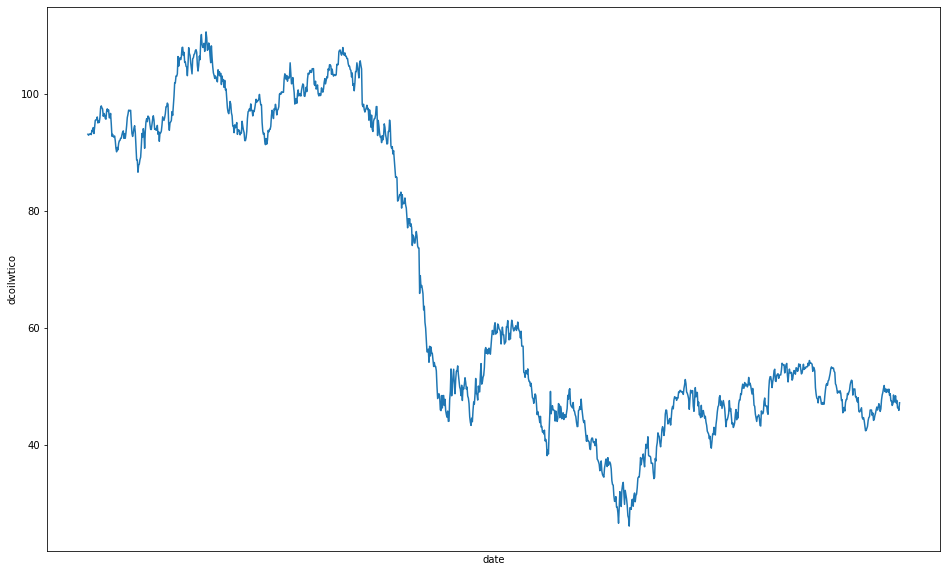

In [17]:
### Котировки нефти

fig = plt.figure()
fig.set_size_inches(16, 10)

oil = oil.fillna(method='ffill')

sns.lineplot(data=oil,
             x='date',
             y='dcoilwtico')


plt.xticks([])

plt.show()

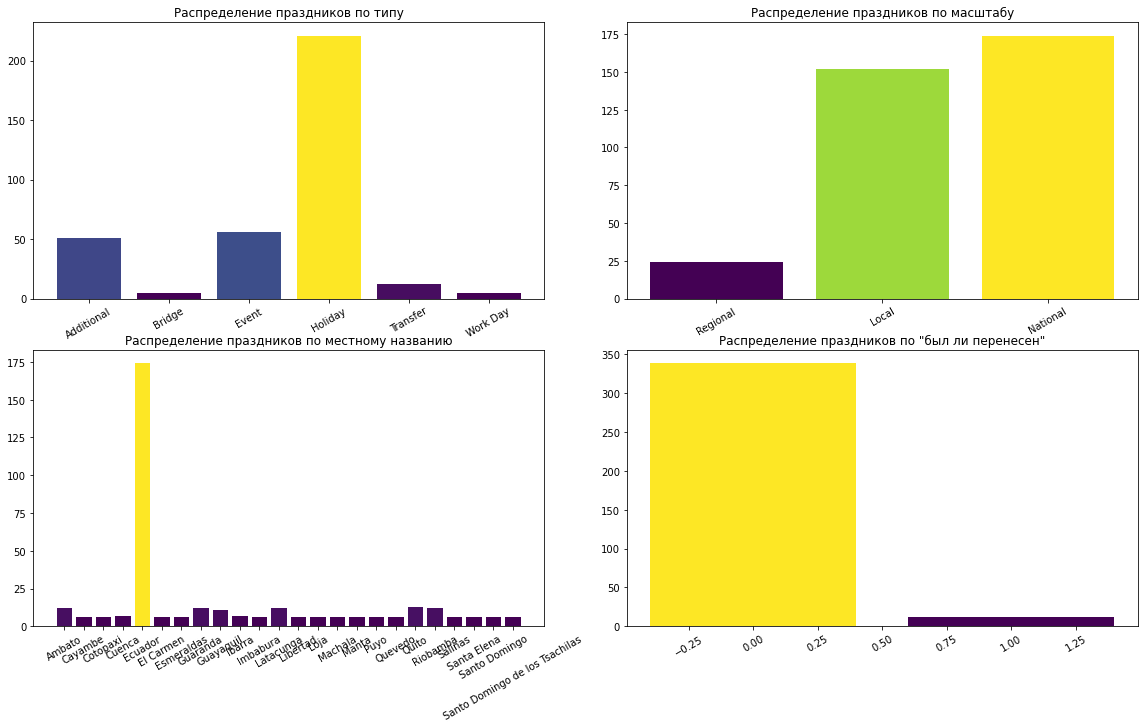

In [18]:
### Распределения выходных и праздников

fig = plt.figure()
fig.set_size_inches(16, 10)


### по типу
ax_1 = fig.add_subplot(2, 2, 1)

my_cmap = plt.get_cmap("viridis")
rescale = lambda y: (y - np.min(y)) / (np.max(y) - np.min(y))

for_hist = holidays_events.groupby('type').size()
plt.bar(for_hist.index, for_hist.values, color=my_cmap(rescale(for_hist.values)))
plt.xticks(rotation=30, size=10)

### по масштабу
ax_2 = fig.add_subplot(2, 2, 2)

for_hist = holidays_events.groupby('locale').size().sort_values()
plt.bar(for_hist.index, for_hist.values, color=my_cmap(rescale(for_hist.values)))
plt.xticks(rotation=30, size=10)

### по местному названию
ax_3 = fig.add_subplot(2, 2, 3)

for_hist = holidays_events.groupby('locale_name').size()
plt.bar(for_hist.index, for_hist.values, color=my_cmap(rescale(for_hist.values)))
plt.xticks(rotation=30, size=10)

### по "был ли перенесен"
ax_4 = fig.add_subplot(2, 2, 4)

for_hist = holidays_events.groupby('transferred').size()
plt.bar(for_hist.index, for_hist.values, color=my_cmap(rescale(for_hist.values)))
plt.xticks(rotation=30, size=10)

fig.tight_layout()

ax_1.set(title = 'Распределение праздников по типу')
ax_2.set(title = 'Распределение праздников по масштабу')
ax_3.set(title = 'Распределение праздников по местному названию')
ax_4.set(title = 'Распределение праздников по "был ли перенесен"')

plt.show()

In [22]:
### Присоединим котировки нефти по дате

df = pd.merge(train,
              oil,
              on='date',
              how='left')#добавляются столбцы из 2 датафрейма, втор датаф подстраивается под второй, но все строки из 1 датафр - берутся

### Заполним пропуски

df

,date,store_nbr,item_nbr,unit_sales,onpromotion,month,dcoilwtico
0,2013-01-01,25,257847,90.000,NaN,2013-01,NaN
1,2013-01-01,25,953609,1.000,NaN,2013-01,NaN
2,2013-01-01,25,671706,2.548,NaN,2013-01,NaN
3,2013-01-01,25,999545,1.000,NaN,2013-01,NaN
4,2013-01-01,25,890372,1.000,NaN,2013-01,NaN
...,...,...,...,...,...,...,...
6274847,2017-08-15,46,2026858,4.000,1,2017-08,47.57
6274848,2017-08-15,45,368260,16.000,0,2017-08,47.57
6274849,2017-08-15,20,1576262,1.000,0,2017-08,47.57
6274850,2017-08-15,42,1346631,1.000,0,2017-08,47.57


In [23]:
df[~df['dcoilwtico'].isna()].iloc[0]

date           2013-01-02
store_nbr              50
item_nbr           936994
unit_sales            8.0
onpromotion           NaN
month             2013-01
dcoilwtico          93.14
Name: 26, dtype: object

In [24]:
min_date_price = df[~df['dcoilwtico'].isna()].iloc[0][-1]

df['dcoilwtico'] = df['dcoilwtico'].fillna(method='ffill')
df['dcoilwtico'] = df['dcoilwtico'].fillna(min_date_price)

df.shape

(6274852, 7)

In [25]:
### Присоединим информацию по магазинам

df_2 = pd.merge(df,
              stores,
              on='store_nbr',
              how='left')

print(f"Размер датасета: {df_2.shape}")

df_2.isna().sum()

Размер датасета: (6274852, 11)


date           0
store_nbr      0
item_nbr       0
unit_sales     0
onpromotion    0
month          0
dcoilwtico     0
city           0
state          0
type           0
cluster        0
dtype: int64

In [26]:
### Присоединим информацию по товарам

df_3 = pd.merge(df_2,
                items,
                on='item_nbr',
                how='left')

print(f"Размер датасета: {df_3.shape}")

df_3.isna().sum()

Размер датасета: (6274852, 14)


date           0
store_nbr      0
item_nbr       0
unit_sales     0
onpromotion    0
month          0
dcoilwtico     0
city           0
state          0
type           0
cluster        0
family         0
class          0
perishable     0
dtype: int64

In [27]:
### Присоединим информацию по праздничным дням

df_4 = pd.merge(df_3,
                holidays_events.rename({"type":"holiday_type"}, axis=1),
                on='date',
                how='left')

print(f"Размер датасета: {df_4.shape}")

df_4.isna().sum()

Размер датасета: (6397785, 19)


date                  0
store_nbr             0
item_nbr              0
unit_sales            0
onpromotion           0
month                 0
dcoilwtico            0
city                  0
state                 0
type                  0
cluster               0
family                0
class                 0
perishable            0
holiday_type    5306754
locale          5306754
locale_name     5306754
description     5306754
transferred     5306754
dtype: int64

In [28]:
### Заполним пропуски инфой, что это был рабочий день

df_4["holiday_type"] = df_4["holiday_type"].fillna("WorkingDay")
df_4["locale"] = df_4["locale"].fillna("WorkingDay")
df_4["locale_name"] = df_4["locale_name"].fillna("WorkingDay")
df_4["description"] = df_4["description"].fillna("WorkingDay")
df_4["transferred"] = df_4["holiday_type"].fillna(False)

df_4.isna().sum()

date            0
store_nbr       0
item_nbr        0
unit_sales      0
onpromotion     0
month           0
dcoilwtico      0
city            0
state           0
type            0
cluster         0
family          0
class           0
perishable      0
holiday_type    0
locale          0
locale_name     0
description     0
transferred     0
dtype: int64

In [29]:
df_4["transferred"].unique()

array(['Holiday', 'WorkingDay', 'Work Day', 'Additional', 'Event',
       'Transfer', 'Bridge'], dtype=object)

In [30]:
df_4.head()

,date,store_nbr,item_nbr,unit_sales,onpromotion,month,dcoilwtico,city,state,type,cluster,family,class,perishable,holiday_type,locale,locale_name,description,transferred
0,2013-01-01,25,257847,90.000,NaN,2013-01,93.14,Salinas,Santa Elena,D,1,BEVERAGES,1120,0,Holiday,National,Ecuador,Primer dia del ano,Holiday
1,2013-01-01,25,953609,1.000,NaN,2013-01,93.14,Salinas,Santa Elena,D,1,CLEANING,3046,0,Holiday,National,Ecuador,Primer dia del ano,Holiday
2,2013-01-01,25,671706,2.548,NaN,2013-01,93.14,Salinas,Santa Elena,D,1,DELI,2664,1,Holiday,National,Ecuador,Primer dia del ano,Holiday
3,2013-01-01,25,999545,1.000,NaN,2013-01,93.14,Salinas,Santa Elena,D,1,CLEANING,3026,0,Holiday,National,Ecuador,Primer dia del ano,Holiday
4,2013-01-01,25,890372,1.000,NaN,2013-01,93.14,Salinas,Santa Elena,D,1,GROCERY I,1002,0,Holiday,National,Ecuador,Primer dia del ano,Holiday


Сгенерим трансформер для обработки признаков!

In [31]:
### Возвраты товаров - это скорее выбросы

df_4 = df_4[df_4['unit_sales'] > 0]